In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
divorce = pd.read_csv('divorce.csv')
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [3]:
# divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])
# divorce.head(2)

# divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"]) # Same as parse_dates
# divorce.dtypes

In [4]:
# divorce["marriage_month"] = divorce["marriage_date"].dt.month
# divorce.head()

In [5]:
# sns.lineplot(data=divorce, x='marriage_month', y='marriage_duration')
# plt.show()

In [6]:
divorce = pd.read_csv('divorce.csv', parse_dates=["divorce_date", "dob_man", "dob_woman"])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object

In [7]:
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

divorce["marriage_year"] = divorce["marriage_date"].dt.year

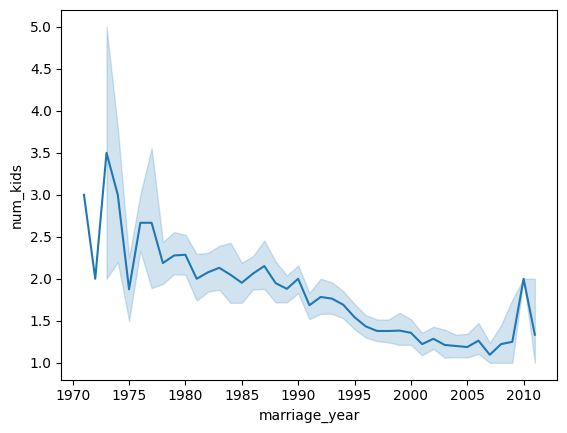

In [8]:
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()

In [9]:
divorce.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


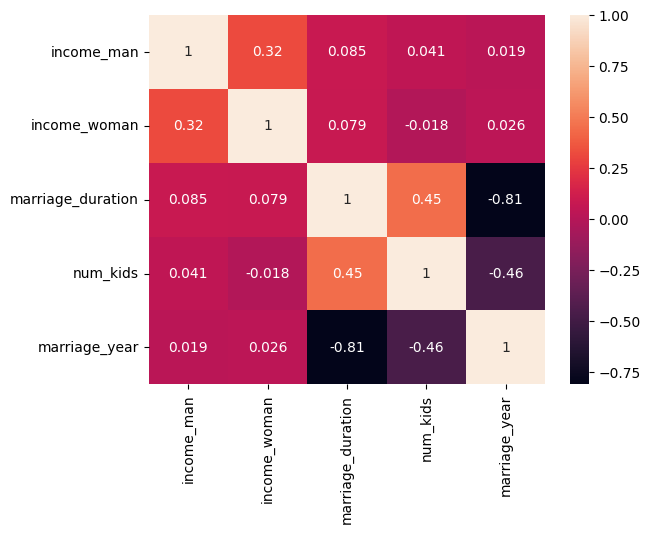

In [10]:
sns.heatmap(divorce.corr(numeric_only=True), annot=True)
plt.show()

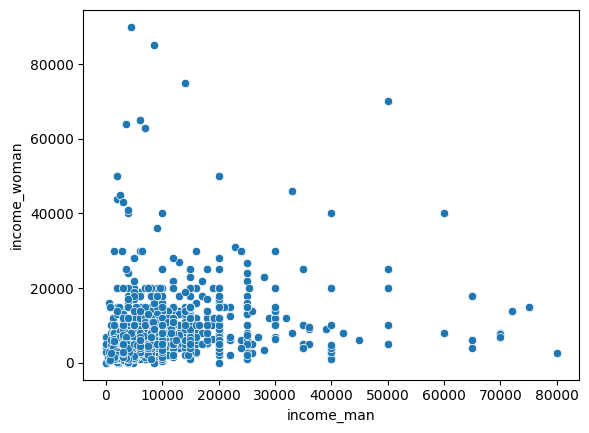

In [11]:
sns.scatterplot(data=divorce, x='income_man', y='income_woman')
plt.show()

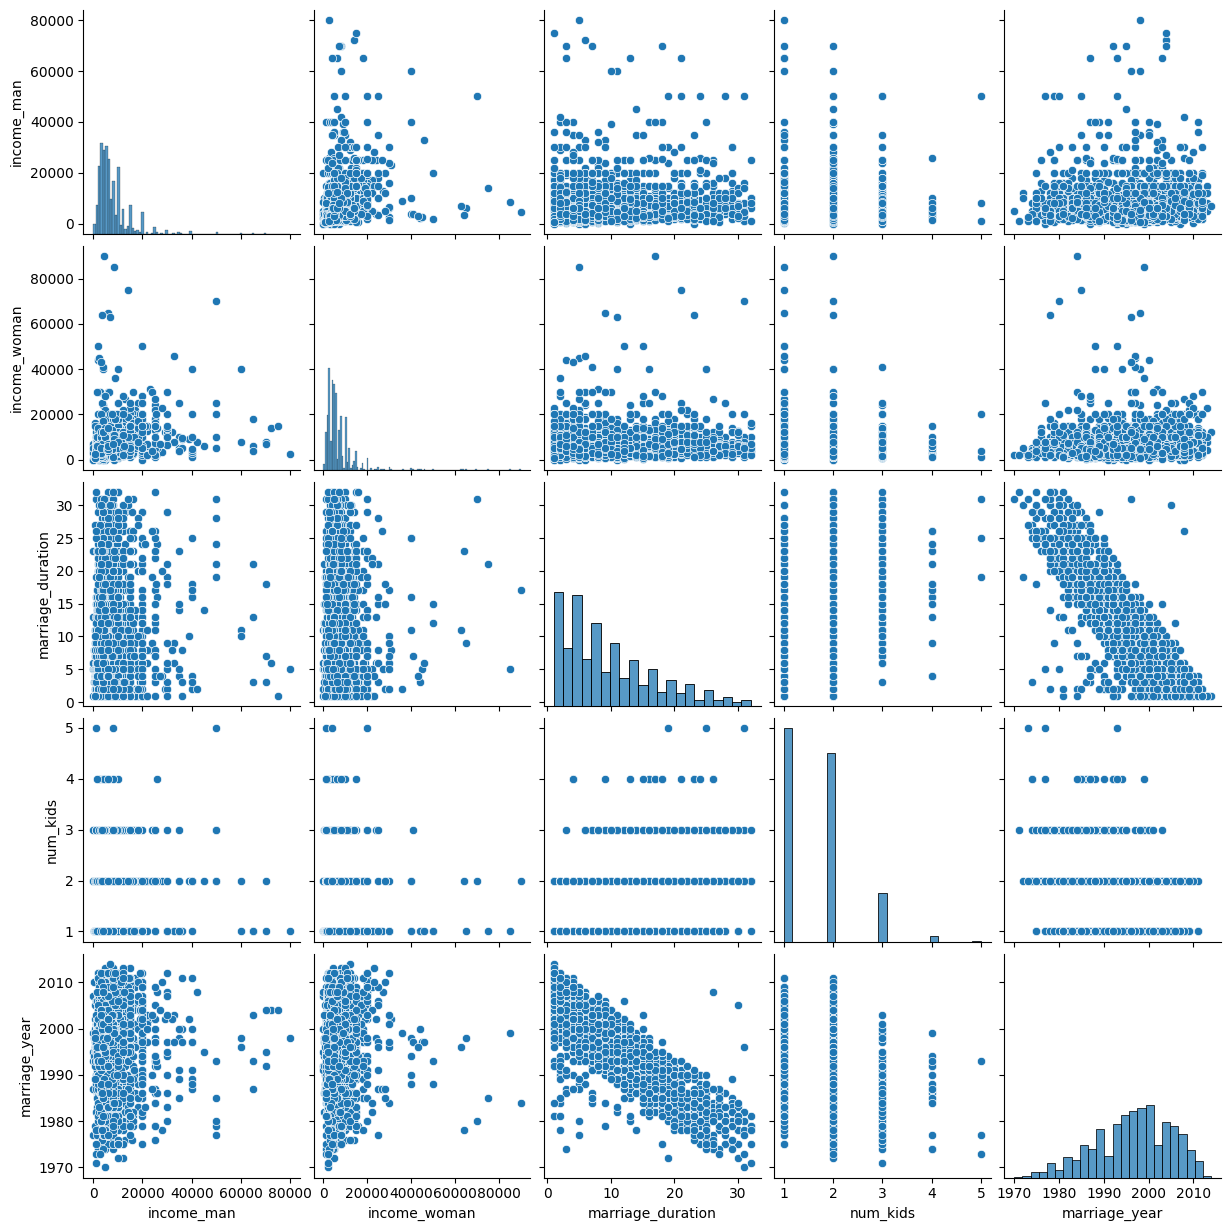

In [12]:
sns.pairplot(data=divorce)
plt.show()

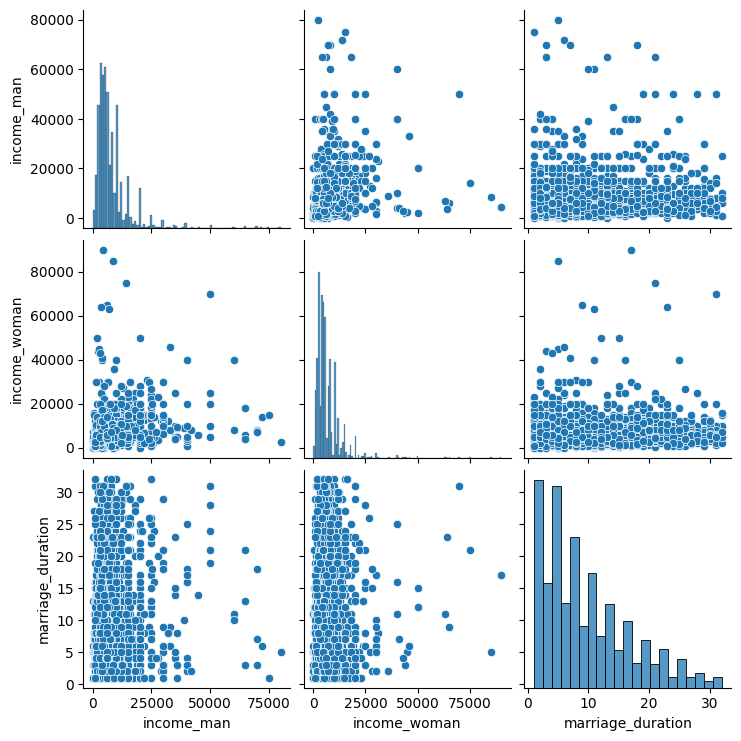

In [13]:
sns.pairplot(data=divorce, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()

Before: 
divorce_date            0
dob_man                 0
education_man           4
income_man              0
dob_woman               0
education_woman         0
income_woman            0
marriage_date           0
marriage_duration       0
num_kids              876
marriage_year           0
num_kids_temp           0
man_age_marriage        0
woman_age_marriage      0
dtype: int64

After: 
divorce_date            0
dob_man                 0
education_man           4
income_man              0
dob_woman               0
education_woman         0
income_woman            0
marriage_date           0
marriage_duration       0
num_kids              876
marriage_year           0
num_kids_temp           0
man_age_marriage        0
woman_age_marriage      0
dtype: int64


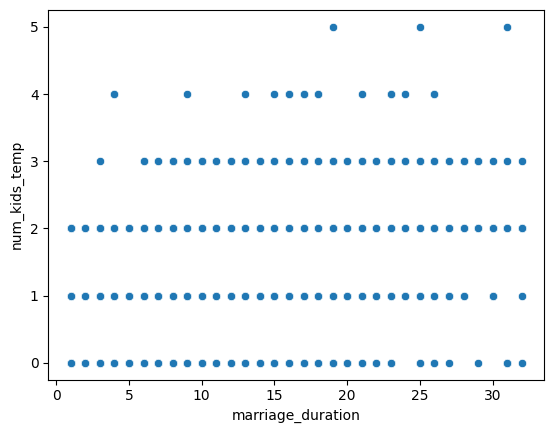

In [56]:
print("Before: ")
print(divorce.isna().sum())
divorce["num_kids_temp"] = divorce["num_kids"].fillna(0)
print("\nAfter: ")
print(divorce.isna().sum())

sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids_temp')
plt.show()

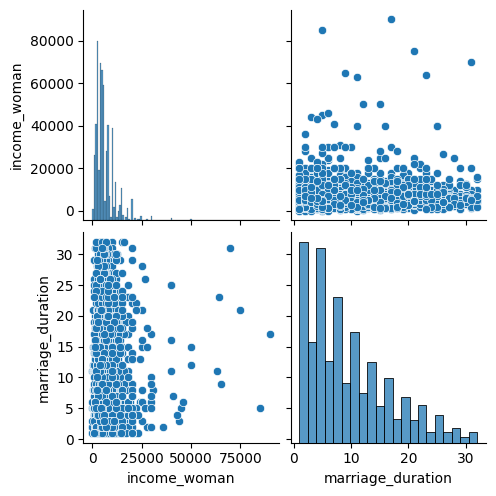

In [15]:
sns.pairplot(data=divorce, vars=["income_woman", "marriage_duration"])

In [16]:
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

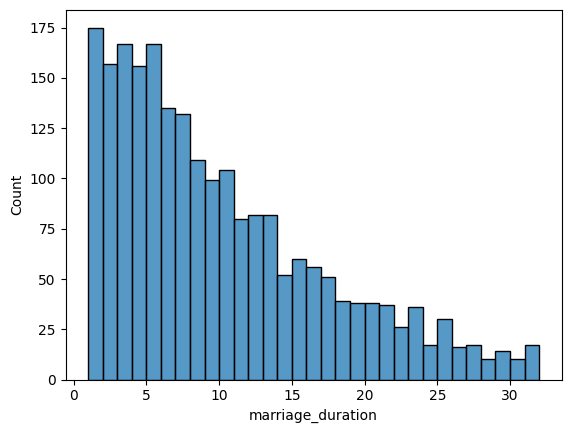

In [17]:
sns.histplot(data=divorce, x='marriage_duration', binwidth=1)
plt.show()

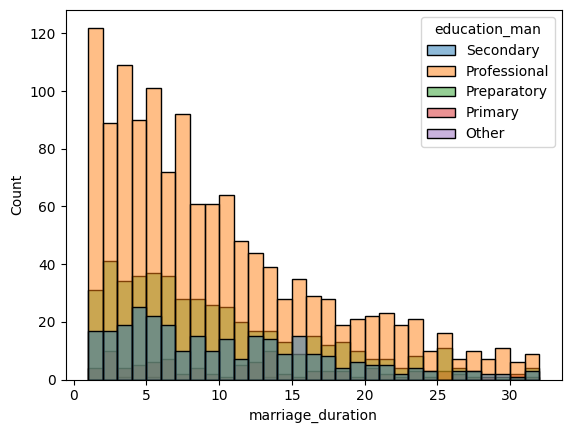

In [18]:
sns.histplot(data=divorce, x='marriage_duration', hue='education_man', binwidth=1)
plt.show()

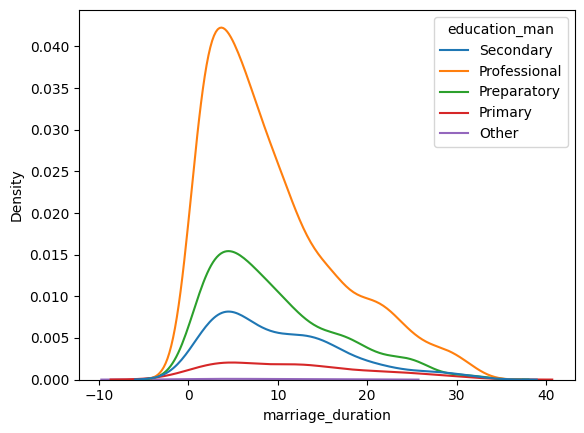

In [19]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man')
plt.show()

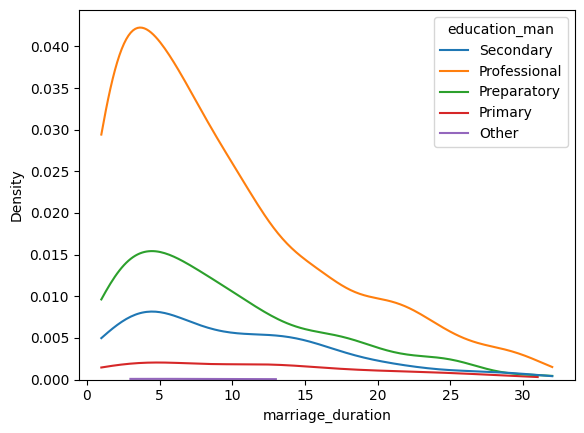

In [20]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0)
plt.show()

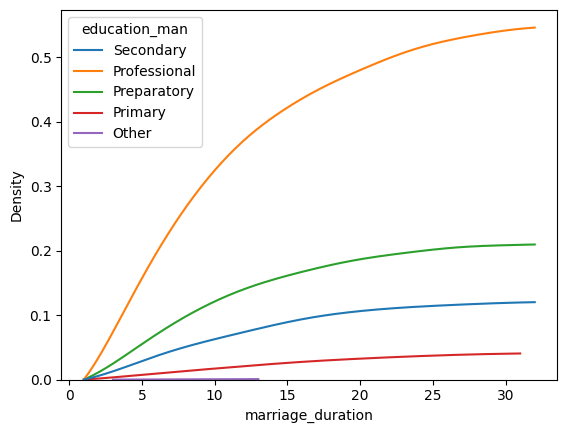

In [21]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0, cumulative=True)
plt.show()

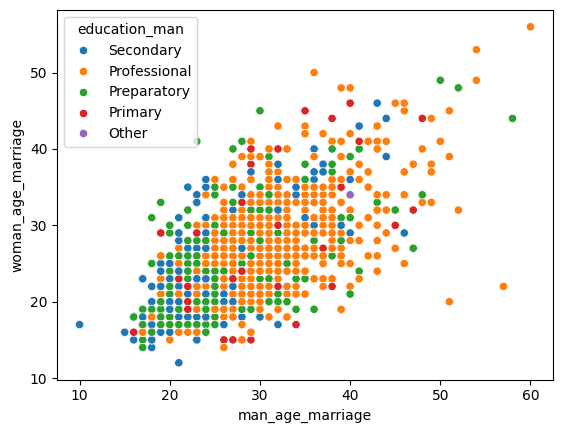

In [22]:
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year

sns.scatterplot(data=divorce, x='man_age_marriage', y='woman_age_marriage', hue='education_man')
plt.show()

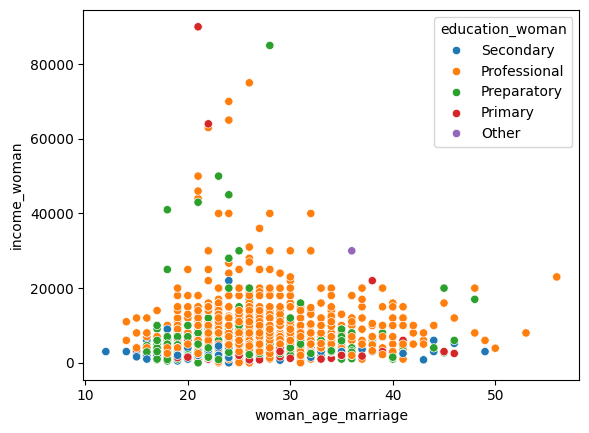

In [23]:
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

In [24]:
planes = pd.read_csv("Airlines_unclean.csv", index_col=0)

print(planes["Destination"].value_counts())

Destination
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: count, dtype: int64


In [25]:
pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


In [26]:
salaries = pd.read_csv("Salary_Rupee_USD.csv", index_col=0)

relative_frequency = salaries["Job_Category"].value_counts(normalize=True)
relative_frequency

Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64

In [27]:
pd.crosstab(index=salaries["Company_Size"], columns=salaries["Experience"])

Experience,EN,EX,MI,SE
Company_Size,,,,
L,24,7,49,44
M,25,9,58,136
S,18,1,21,15


In [28]:
pd.crosstab(index=salaries["Job_Category"], columns=salaries["Company_Size"])

Company_Size,L,M,S
Job_Category,,,
Data Analytics,23,61,8
Data Engineering,28,72,11
Data Science,38,59,16
Machine Learning,17,19,13
Managerial,5,8,1
Other,13,9,6


In [29]:
pd.crosstab(index=salaries["Job_Category"], columns=salaries["Company_Size"], values=salaries["Salary_USD"], aggfunc="mean")

Company_Size,L,M,S
Job_Category,,,
Data Analytics,112851.749217,95912.685246,53741.877000
Data Engineering,118939.035000,121287.060500,86927.136000
Data Science,96489.520105,116044.455864,62241.749250
Machine Learning,140779.491529,100794.236842,78812.586462
Managerial,190551.448800,150713.628000,31484.700000
Other,92873.911385,89750.578667,69871.248000


<class 'pandas.core.frame.DataFrame'>
Index: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10233 non-null  object        
 1   Date_of_Journey  10338 non-null  datetime64[ns]
 2   Source           10473 non-null  object        
 3   Destination      10313 non-null  object        
 4   Route            10404 non-null  object        
 5   Dep_Time         10400 non-null  object        
 6   Arrival_Time     10466 non-null  object        
 7   Duration         10446 non-null  float64       
 8   Total_Stops      10448 non-null  object        
 9   Additional_Info  10071 non-null  object        
 10  Price            10044 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 999.4+ KB
None


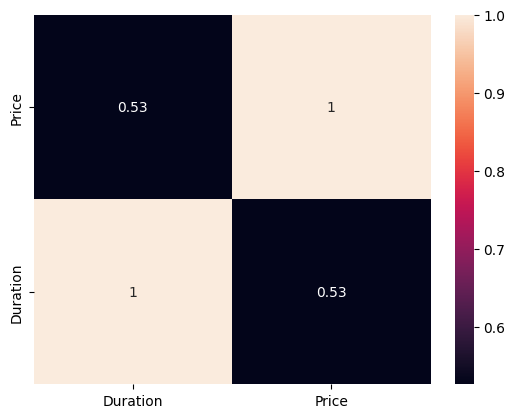

In [30]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0, parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'], date_format = "%d/%m/%Y" )

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)
print(planes.info())
ax = sns.heatmap(planes.corr(numeric_only=True), annot=True)
ax.set_ylim([0,2])
plt.show()

In [31]:
#remove Nan values
threshold = len(planes) * 0.05
print(threshold)

# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())

#planes = planes.drop(columns = ['Additional_Info’])
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('============================================')
# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)
print('============================================')
# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))
# Check for missing values
print(planes.isna().sum())

533.0
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline              0
D

In [32]:
print(planes["Total_Stops"].value_counts())

Total_Stops
1 stop      4467
non-stop    2786
2 stops     1219
3 stops       35
4 stops        1
Name: count, dtype: int64


In [33]:
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop", "0")
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", "")
planes["Total_Stops"] = planes["Total_Stops"].astype(int)

In [34]:
print(planes["Total_Stops"].value_counts())

Total_Stops
1    4467
0    2786
2    1219
3      35
4       1
Name: count, dtype: int64


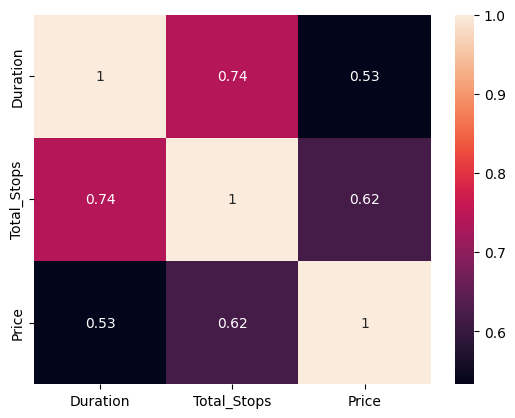

In [35]:
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()

In [36]:
print(planes.dtypes)

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                 int64
Additional_Info            object
Price                     float64
dtype: object


In [37]:
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
print(planes[["month", "weekday", "Date_of_Journey"]].head())

   month  weekday Date_of_Journey
0      6        6      2019-06-09
1      5        6      2019-05-12
2      3        4      2019-03-01
3      6        0      2019-06-24
4      3        1      2019-03-12


In [38]:
planes["Dep_Time"] = pd.to_datetime(planes["Dep_Time"], format='mixed')
planes["Arrival_Time"] = pd.to_datetime(planes["Arrival_Time"], format='mixed')

planes["Dep_Hour"] = planes["Dep_Time"].dt.hour
planes["Arrival_Hour"] = planes["Arrival_Time"].dt.hour

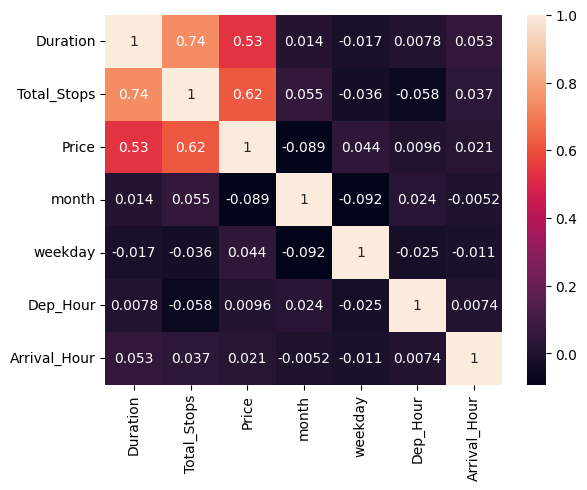

In [39]:
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()

In [40]:
print(planes["Price"].describe())

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


In [41]:
twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].median()
seventy_fifth = planes["Price"].quantile(0.75)
maximum = planes["Price"].max()

In [42]:
labels = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

In [43]:
planes["Price Category"] = pd.cut(planes["Price"], bins=bins, labels=labels)
planes[["Price", "Price Category"]].head()

,Price,Price Category
0,13882.0,First Class
1,6218.0,Premium Economy
2,13302.0,First Class
3,3873.0,Economy
4,11087.0,Business Class


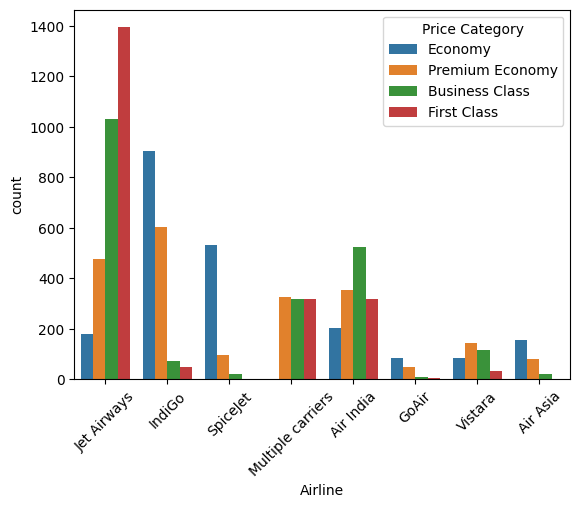

In [44]:
sns.countplot(data=planes,x="Airline" , hue="Price Category")
plt.xticks(rotation=45)
plt.show()

In [45]:
salaries = pd.read_csv('Salaries_with_date_of_response.csv', index_col=0)
salaries["date_of_response"] = pd.to_datetime(salaries["date_of_response"], format='%d/%m/%Y')


In [46]:
salaries.dtypes

Designation                     object
date_of_response        datetime64[ns]
Experience                      object
Employment_Status               object
Salary_In_Rupees               float64
Employee_Location               object
Company_Location                object
Company_Size                    object
Remote_Working_Ratio             int64
Salary_USD                     float64
Job_Category                    object
dtype: object

In [47]:
salaries["month"] = salaries["date_of_response"].dt.month
salaries["weekday"] = salaries["date_of_response"].dt.weekday

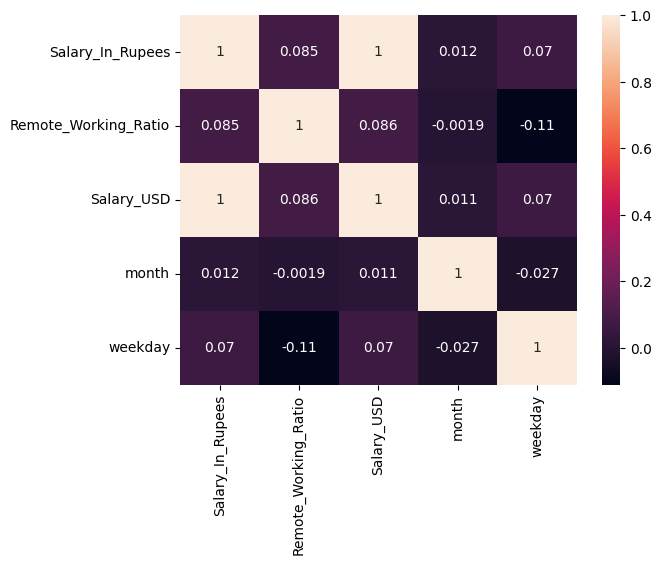

In [48]:
sns.heatmap(salaries.corr(numeric_only=True), annot=True)
plt.show()

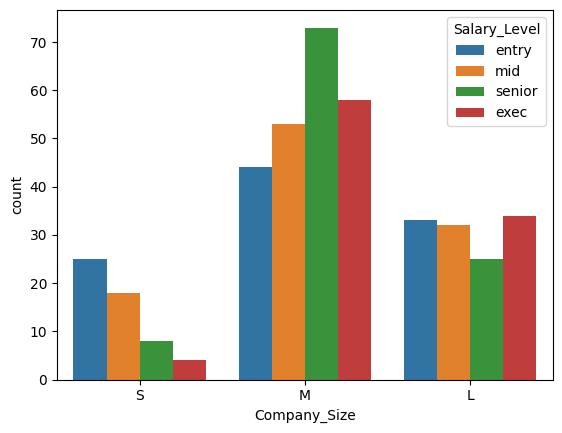

In [49]:
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
salaries_median = salaries["Salary_USD"].median()
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

salary_labels = ["entry", "mid", "senior", "exec"]
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

salaries["Salary_Level"] = pd.cut(salaries["Salary_USD"], bins=salary_ranges, labels=salary_labels)

sns.countplot(data=salaries, x="Company_Size", hue="Salary_Level")
plt.show()

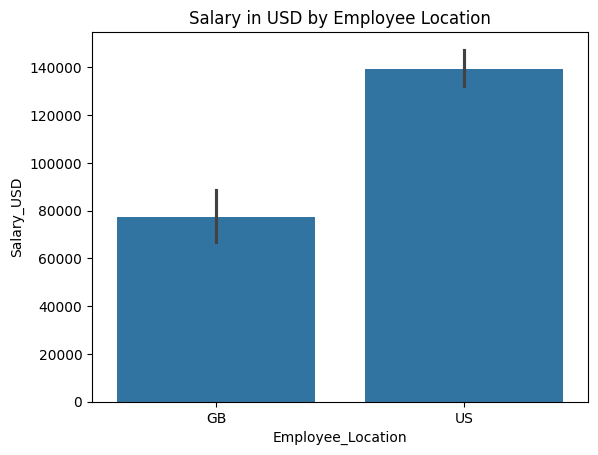

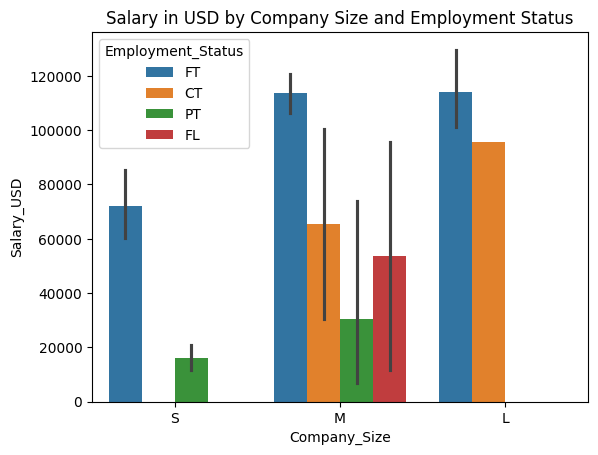

In [50]:
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.title("Salary in USD by Employee Location")
plt.show()

sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.title("Salary in USD by Company Size and Employment Status")
plt.show()